In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [384]:
# Read the CSV files
MCI_toronto_df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\major-crime-indicators.csv')
neighbourhoods_df = pd.read_csv('C:\\Users\\Lenovo\\Documents\\Neighbourhoods.csv')

# Check the column names and data types of both DataFrames
print("MCI Toronto DataFrame:")
print(MCI_toronto_df.info())
print("\nNeighbourhoods DataFrame:")
print(neighbourhoods_df.info())

# Add leading zeros to HOOD_158 column in MCI_toronto_data
MCI_toronto_df['HOOD_158'] = MCI_toronto_df['HOOD_158'].astype(str).str.zfill(3)

# Convert AREA_LONG_CODE to string in neighbourhoods_df
neighbourhoods_df['AREA_LONG_CODE'] = neighbourhoods_df['AREA_LONG_CODE'].astype(str).str.zfill(3)

# Merge the two DataFrames based on the HOOD_158 and AREA_LONG_CODE columns
#MCI_toronto_df = pd.merge(MCI_toronto_df, neighbourhoods_df, left_on='HOOD_158', right_on='AREA_LONG_CODE', how='left')

# Merge the two DataFrames based on the specified columns and select only the desired columns
MCI_toronto_df = pd.merge(MCI_toronto_df, 
                     neighbourhoods_df[['AREA_LONG_CODE','LATITUDE', 'LONGITUDE']], 
                     left_on='HOOD_158', 
                     right_on='AREA_LONG_CODE', 
                     how='left')



# Display the merged DataFrame
print("\nMerged DataFrame:")
print(MCI_toronto_df.head())

# Get the count of records
record_count = len(MCI_toronto_df)
print("Number of records after left join:", record_count)

MCI Toronto DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384687 entries, 0 to 384686
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   _id                384687 non-null  int64  
 1   EVENT_UNIQUE_ID    384687 non-null  object 
 2   REPORT_DATE        64317 non-null   object 
 3   OCC_DATE           63991 non-null   object 
 4   REPORT_YEAR        384687 non-null  int64  
 5   REPORT_MONTH       384687 non-null  object 
 6   REPORT_DAY         384687 non-null  int64  
 7   REPORT_DOY         384687 non-null  int64  
 8   REPORT_DOW         384687 non-null  object 
 9   REPORT_HOUR        384687 non-null  int64  
 10  OCC_YEAR           384566 non-null  float64
 11  OCC_MONTH          384566 non-null  object 
 12  OCC_DAY            384566 non-null  float64
 13  OCC_DOY            384566 non-null  float64
 14  OCC_DOW            384566 non-null  object 
 15  OCC_HOUR           384687 no

In [385]:
#MCI_toronto_df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\major-crime-indicators.csv')
#MCI_toronto_df.head()

In [386]:
MCI_toronto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384687 entries, 0 to 384686
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   _id                384687 non-null  int64  
 1   EVENT_UNIQUE_ID    384687 non-null  object 
 2   REPORT_DATE        64317 non-null   object 
 3   OCC_DATE           63991 non-null   object 
 4   REPORT_YEAR        384687 non-null  int64  
 5   REPORT_MONTH       384687 non-null  object 
 6   REPORT_DAY         384687 non-null  int64  
 7   REPORT_DOY         384687 non-null  int64  
 8   REPORT_DOW         384687 non-null  object 
 9   REPORT_HOUR        384687 non-null  int64  
 10  OCC_YEAR           384566 non-null  float64
 11  OCC_MONTH          384566 non-null  object 
 12  OCC_DAY            384566 non-null  float64
 13  OCC_DOY            384566 non-null  float64
 14  OCC_DOW            384566 non-null  object 
 15  OCC_HOUR           384687 non-null  int64  
 16  DI

In [387]:
# to find out missing values in the columns
missing_values = MCI_toronto_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
_id                       0
EVENT_UNIQUE_ID           0
REPORT_DATE          320370
OCC_DATE             320696
REPORT_YEAR               0
REPORT_MONTH              0
REPORT_DAY                0
REPORT_DOY                0
REPORT_DOW                0
REPORT_HOUR               0
OCC_YEAR                121
OCC_MONTH               121
OCC_DAY                 121
OCC_DOY                 121
OCC_DOW                 121
OCC_HOUR                  0
DIVISION                  0
LOCATION_TYPE             0
PREMISES_TYPE             0
UCR_CODE                  0
UCR_EXT                   0
OFFENCE                   0
MCI_CATEGORY              0
HOOD_158                  0
NEIGHBOURHOOD_158         0
HOOD_140                  0
NEIGHBOURHOOD_140         0
AREA_LONG_CODE         5925
LATITUDE               5925
LONGITUDE              5925
dtype: int64


In [388]:
#getting the count of the dataset
count_of_dataset = MCI_toronto_df.shape[0]

print(f"Count of the dataset: {count_of_dataset}")

Count of the dataset: 384687


In [389]:
# Drop the specified columns from the DataFrame because it has a lot of missing values and the dates are not in the right format
MCI_toronto_df.drop(columns=['REPORT_DATE', 'OCC_DATE'], inplace=True)


In [390]:
# dropping rows with NaN values in specific columns
MCI_toronto_df.dropna(subset=['OCC_YEAR', 'OCC_MONTH', 'OCC_DAY'], inplace=True)


In [391]:
# Convert 'OCC_DAY' column from float to int64
MCI_toronto_df['OCC_DAY'] = MCI_toronto_df['OCC_DAY'].astype('int64')

# Convert 'OCC_YEAR' column from float to int64
MCI_toronto_df['OCC_YEAR'] = MCI_toronto_df['OCC_YEAR'].astype('int64')

MCI_toronto_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 384566 entries, 0 to 384686
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   _id                384566 non-null  int64  
 1   EVENT_UNIQUE_ID    384566 non-null  object 
 2   REPORT_YEAR        384566 non-null  int64  
 3   REPORT_MONTH       384566 non-null  object 
 4   REPORT_DAY         384566 non-null  int64  
 5   REPORT_DOY         384566 non-null  int64  
 6   REPORT_DOW         384566 non-null  object 
 7   REPORT_HOUR        384566 non-null  int64  
 8   OCC_YEAR           384566 non-null  int64  
 9   OCC_MONTH          384566 non-null  object 
 10  OCC_DAY            384566 non-null  int64  
 11  OCC_DOY            384566 non-null  float64
 12  OCC_DOW            384566 non-null  object 
 13  OCC_HOUR           384566 non-null  int64  
 14  DIVISION           384566 non-null  object 
 15  LOCATION_TYPE      384566 non-null  object 
 16  PREMISE

In [392]:
# Debugging: Print concatenated strings before conversion
print("Concatenated strings for calc_report_date:")
print(MCI_toronto_df['REPORT_YEAR'].astype(str) + '-' + MCI_toronto_df['REPORT_MONTH'].astype(str) + '-' + MCI_toronto_df['REPORT_DAY'].astype(str))

print("\nConcatenated strings for calc_occ_date:")
print(MCI_toronto_df['OCC_YEAR'].astype(str) + '-' + MCI_toronto_df['OCC_MONTH'].astype(str) + '-' + MCI_toronto_df['OCC_DAY'].astype(str))


Concatenated strings for calc_report_date:
0         2014-January-1
1         2014-January-1
2         2014-January-1
3         2014-January-1
4         2014-January-1
               ...      
384682     2024-March-31
384683     2024-March-31
384684     2024-March-31
384685     2024-March-31
384686     2024-March-31
Length: 384566, dtype: object

Concatenated strings for calc_occ_date:
0         2014-January-1
1         2014-January-1
2         2014-January-1
3         2014-January-1
4         2014-January-1
               ...      
384682     2024-March-30
384683     2024-March-31
384684     2024-March-31
384685     2024-March-30
384686     2024-March-30
Length: 384566, dtype: object


In [393]:
# Replace periods with hyphens in concatenated strings before conversion
MCI_toronto_df['calc_report_date'] = pd.to_datetime(MCI_toronto_df['REPORT_YEAR'].astype(str) + '-' + MCI_toronto_df['REPORT_MONTH'].astype(str) + '-' + MCI_toronto_df['REPORT_DAY'].astype(str).replace(r'\.0', ''), format='%Y-%B-%d', errors='coerce')
MCI_toronto_df['calc_occ_date'] = pd.to_datetime(MCI_toronto_df['OCC_YEAR'].astype(str) + '-' + MCI_toronto_df['OCC_MONTH'].astype(str) + '-' + MCI_toronto_df['OCC_DAY'].astype(str).replace(r'\.0', ''), format='%Y-%B-%d', errors='coerce')
#MCI_toronto_df['calc_occ_date'] = pd.to_datetime(MCI_toronto_df['OCC_YEAR'].astype(str) + '-' + MCI_toronto_df['OCC_MONTH'].astype(str) + '-' + MCI_toronto_df['OCC_DAY'].astype(str).replace(r'\.0', ''), format='%Y-%m-%d', errors='coerce')

# Print the first few rows to verify the new columns
print(MCI_toronto_df[['calc_report_date', 'calc_occ_date']].head(25))
print(MCI_toronto_df.head(25))


   calc_report_date calc_occ_date
0        2014-01-01    2014-01-01
1        2014-01-01    2014-01-01
2        2014-01-01    2014-01-01
3        2014-01-01    2014-01-01
4        2014-01-01    2014-01-01
5        2014-01-01    2014-01-01
6        2014-01-01    2013-12-29
7        2014-01-01    2014-01-01
8        2014-01-01    2014-01-01
9        2014-01-01    2014-01-01
10       2014-01-01    2014-01-01
11       2014-01-01    2014-01-01
12       2014-01-01    2014-01-01
13       2014-01-01    2012-03-01
14       2014-01-01    2014-01-01
15       2014-01-01    2014-01-01
16       2014-01-01    2014-01-01
17       2014-01-01    2014-01-01
18       2014-01-01    2014-01-01
19       2014-01-01    2014-01-01
20       2014-01-01    2014-01-01
21       2014-01-01    2014-01-01
22       2014-01-01    2014-01-01
23       2014-01-01    2014-01-01
24       2014-01-01    2014-01-01
    _id EVENT_UNIQUE_ID  REPORT_YEAR REPORT_MONTH  REPORT_DAY  REPORT_DOY  \
0     1  GO-20141260127         2014   

In [394]:
# Check unique values in the OCC_MONTH column
print(MCI_toronto_df['OCC_MONTH'].unique())


['January' 'December' 'March' 'May' 'June' 'November' 'September' 'July'
 'February' 'October' 'August' 'April']


In [395]:
# Replace periods with hyphens in concatenated strings before conversion
MCI_toronto_df['calc_report_date'] = pd.to_datetime(MCI_toronto_df['REPORT_YEAR'].astype(str) + '-' + MCI_toronto_df['REPORT_MONTH'].astype(str) + '-' + MCI_toronto_df['REPORT_DAY'].astype(str).replace(r'\.0', ''), format='%Y-%B-%d', errors='coerce')
#MCI_toronto_df['calc_occ_date'] = pd.to_datetime(MCI_toronto_df['OCC_YEAR'].astype(str) + '-' + MCI_toronto_df['OCC_MONTH'].astype(str) + '-' + MCI_toronto_df['OCC_DAY'].astype(str).replace(r'\.0', ''), format='%Y-%B-%d', errors='coerce')
print(MCI_toronto_df['OCC_MONTH'].unique())

# Handle non-numeric values (assuming 'OCC_MONTH' contains month names)
# For example, replace month names with corresponding numeric values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
MCI_toronto_df['OCC_MONTH'] = MCI_toronto_df['OCC_MONTH'].map(month_mapping)
# Print the first few rows to verify the new columns
print(MCI_toronto_df[['calc_report_date', 'calc_occ_date']].head(25))
print(MCI_toronto_df.tail(50))


['January' 'December' 'March' 'May' 'June' 'November' 'September' 'July'
 'February' 'October' 'August' 'April']
   calc_report_date calc_occ_date
0        2014-01-01    2014-01-01
1        2014-01-01    2014-01-01
2        2014-01-01    2014-01-01
3        2014-01-01    2014-01-01
4        2014-01-01    2014-01-01
5        2014-01-01    2014-01-01
6        2014-01-01    2013-12-29
7        2014-01-01    2014-01-01
8        2014-01-01    2014-01-01
9        2014-01-01    2014-01-01
10       2014-01-01    2014-01-01
11       2014-01-01    2014-01-01
12       2014-01-01    2014-01-01
13       2014-01-01    2012-03-01
14       2014-01-01    2014-01-01
15       2014-01-01    2014-01-01
16       2014-01-01    2014-01-01
17       2014-01-01    2014-01-01
18       2014-01-01    2014-01-01
19       2014-01-01    2014-01-01
20       2014-01-01    2014-01-01
21       2014-01-01    2014-01-01
22       2014-01-01    2014-01-01
23       2014-01-01    2014-01-01
24       2014-01-01    2014-01-01
   

In [396]:
# to find out missing values in the columns
missing_values = MCI_toronto_df.isnull().sum()
missing_values_neighbourhood = neighbourhoods_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
print(missing_values_neighbourhood)

Missing values in each column:
_id                     0
EVENT_UNIQUE_ID         0
REPORT_YEAR             0
REPORT_MONTH            0
REPORT_DAY              0
REPORT_DOY              0
REPORT_DOW              0
REPORT_HOUR             0
OCC_YEAR                0
OCC_MONTH               0
OCC_DAY                 0
OCC_DOY                 0
OCC_DOW                 0
OCC_HOUR                0
DIVISION                0
LOCATION_TYPE           0
PREMISES_TYPE           0
UCR_CODE                0
UCR_EXT                 0
OFFENCE                 0
MCI_CATEGORY            0
HOOD_158                0
NEIGHBOURHOOD_158       0
HOOD_140                0
NEIGHBOURHOOD_140       0
AREA_LONG_CODE       5912
LATITUDE             5912
LONGITUDE            5912
calc_report_date        0
calc_occ_date           0
dtype: int64
_id                      0
AREA_ID                  0
AREA_ATTR_ID             0
PARENT_AREA_ID         158
AREA_SHORT_CODE          0
AREA_LONG_CODE           0
AREA_NAME     

In [397]:
# Calculate the delay in reporting crimes
MCI_toronto_df['REPORT_DELAY'] = (MCI_toronto_df['calc_report_date'] - MCI_toronto_df['calc_occ_date']).dt.days
# Display the values of the REPORT_DELAY column
print(MCI_toronto_df)


           _id EVENT_UNIQUE_ID  REPORT_YEAR REPORT_MONTH  REPORT_DAY  \
0            1  GO-20141260127         2014      January           1   
1            2  GO-20141263725         2014      January           1   
2            3  GO-20141264272         2014      January           1   
3            4  GO-20141263706         2014      January           1   
4            5  GO-20141263710         2014      January           1   
...        ...             ...          ...          ...         ...   
384682  384683   GO-2024688981         2024        March          31   
384683  384684   GO-2024690900         2024        March          31   
384684  384685   GO-2024690985         2024        March          31   
384685  384686   GO-2024690995         2024        March          31   
384686  384687   GO-2024688279         2024        March          31   

        REPORT_DOY  REPORT_DOW  REPORT_HOUR  OCC_YEAR  OCC_MONTH  ...  \
0                1  Wednesday             1      2014         

In [398]:
# Categorize the time of day
def categorize_time(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

MCI_toronto_df['TIME_OF_DAY'] = MCI_toronto_df['OCC_HOUR'].apply(categorize_time)
print(MCI_toronto_df)

           _id EVENT_UNIQUE_ID  REPORT_YEAR REPORT_MONTH  REPORT_DAY  \
0            1  GO-20141260127         2014      January           1   
1            2  GO-20141263725         2014      January           1   
2            3  GO-20141264272         2014      January           1   
3            4  GO-20141263706         2014      January           1   
4            5  GO-20141263710         2014      January           1   
...        ...             ...          ...          ...         ...   
384682  384683   GO-2024688981         2024        March          31   
384683  384684   GO-2024690900         2024        March          31   
384684  384685   GO-2024690985         2024        March          31   
384685  384686   GO-2024690995         2024        March          31   
384686  384687   GO-2024688279         2024        March          31   

        REPORT_DOY  REPORT_DOW  REPORT_HOUR  OCC_YEAR  OCC_MONTH  ...  \
0                1  Wednesday             1      2014         

In [399]:

# Create a calculated field for total crime count using the count of EVENT_UNIQUE_ID
MCI_toronto_df['TOTAL_CRIME_COUNT'] = MCI_toronto_df.groupby('EVENT_UNIQUE_ID')['EVENT_UNIQUE_ID'].transform('count')


In [400]:
# Extract time-based features
MCI_toronto_df['MONTH'] = MCI_toronto_df['calc_occ_date'].dt.month
MCI_toronto_df['YEAR'] = MCI_toronto_df['calc_occ_date'].dt.year
MCI_toronto_df['DAY_OF_WEEK'] = MCI_toronto_df['calc_occ_date'].dt.dayofweek
MCI_toronto_df['HOUR_OF_DAY'] = MCI_toronto_df['calc_occ_date'].dt.hour



In [401]:
# Aggregating crime occurrences by premises type
crime_count_by_premises_type = MCI_toronto_df.groupby('PREMISES_TYPE').size().reset_index(name='CRIME_COUNT_PREMISES')

# Merge the aggregated information back into the original DataFrame
MCI_toronto_df = pd.merge(MCI_toronto_df, crime_count_by_premises_type, on='PREMISES_TYPE', how='left')

# Aggregating crime occurrences by location type
crime_count_by_location_type = MCI_toronto_df.groupby('LOCATION_TYPE').size().reset_index(name='CRIME_COUNT_LOCATION')

# Merge the aggregated information back into the original DataFrame
MCI_toronto_df = pd.merge(MCI_toronto_df, crime_count_by_location_type, on='LOCATION_TYPE', how='left')

# Aggregating crime occurrences by offence
crime_count_by_offence = MCI_toronto_df.groupby('OFFENCE').size().reset_index(name='CRIME_COUNT_OFFENCE')

# Merge the aggregated information back into the original DataFrame
MCI_toronto_df = pd.merge(MCI_toronto_df, crime_count_by_offence, on='OFFENCE', how='left')
print(MCI_toronto_df)

           _id EVENT_UNIQUE_ID  REPORT_YEAR REPORT_MONTH  REPORT_DAY  \
0            1  GO-20141260127         2014      January           1   
1            2  GO-20141263725         2014      January           1   
2            3  GO-20141264272         2014      January           1   
3            4  GO-20141263706         2014      January           1   
4            5  GO-20141263710         2014      January           1   
...        ...             ...          ...          ...         ...   
384561  384683   GO-2024688981         2024        March          31   
384562  384684   GO-2024690900         2024        March          31   
384563  384685   GO-2024690985         2024        March          31   
384564  384686   GO-2024690995         2024        March          31   
384565  384687   GO-2024688279         2024        March          31   

        REPORT_DOY  REPORT_DOW  REPORT_HOUR  OCC_YEAR  OCC_MONTH  ...  \
0                1  Wednesday             1      2014         

In [402]:
MCI_toronto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384566 entries, 0 to 384565
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   _id                   384566 non-null  int64         
 1   EVENT_UNIQUE_ID       384566 non-null  object        
 2   REPORT_YEAR           384566 non-null  int64         
 3   REPORT_MONTH          384566 non-null  object        
 4   REPORT_DAY            384566 non-null  int64         
 5   REPORT_DOY            384566 non-null  int64         
 6   REPORT_DOW            384566 non-null  object        
 7   REPORT_HOUR           384566 non-null  int64         
 8   OCC_YEAR              384566 non-null  int64         
 9   OCC_MONTH             384566 non-null  int64         
 10  OCC_DAY               384566 non-null  int64         
 11  OCC_DOY               384566 non-null  float64       
 12  OCC_DOW               384566 non-null  object        
 13 

In [403]:
# Summary statistics
summary_stats = MCI_toronto_df.describe()
print(summary_stats)


                 _id    REPORT_YEAR     REPORT_DAY     REPORT_DOY  \
count  384566.000000  384566.000000  384566.000000  384566.000000   
mean   192352.711737    2018.961065      15.746863     182.856664   
min         1.000000    2014.000000       1.000000       1.000000   
25%     96187.250000    2016.000000       8.000000      90.000000   
50%    192360.500000    2019.000000      16.000000     184.000000   
75%    288520.750000    2022.000000      23.000000     274.000000   
max    384687.000000    2024.000000      31.000000     366.000000   
std    111044.485449       2.995644       8.772208     105.133812   

         REPORT_HOUR       OCC_YEAR      OCC_MONTH        OCC_DAY  \
count  384566.000000  384566.000000  384566.000000  384566.000000   
mean       12.705624    2018.900043       6.512697      15.445227   
min         0.000000    2000.000000       1.000000       1.000000   
25%         8.000000    2016.000000       3.000000       8.000000   
50%        13.000000    2019.0000

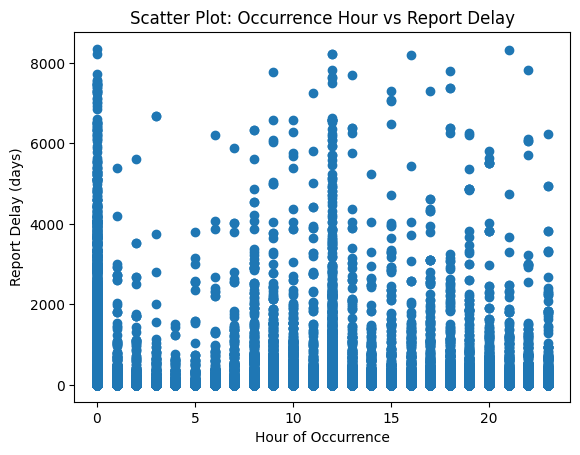

In [404]:
#Scatter plot for time-related columns 
plt.scatter(MCI_toronto_df['OCC_HOUR'], MCI_toronto_df['REPORT_DELAY'])
plt.xlabel('Hour of Occurrence')
plt.ylabel('Report Delay (days)')
plt.title('Scatter Plot: Occurrence Hour vs Report Delay')
plt.show()


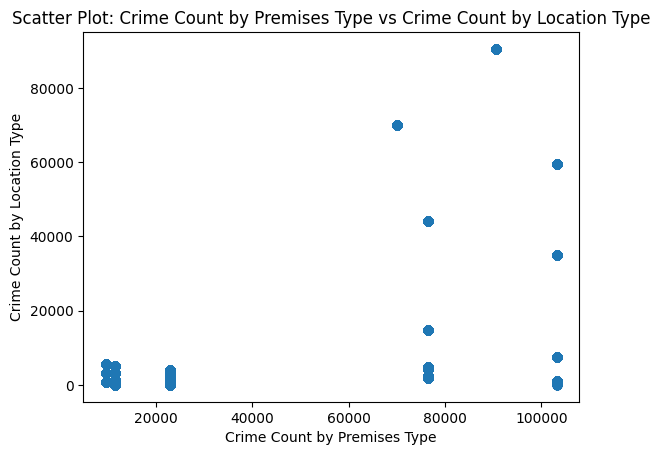

In [405]:
# Scatter plot: Crime Count by Premises Type vs Crime Count by Location Type
plt.scatter(MCI_toronto_df['CRIME_COUNT_PREMISES'], MCI_toronto_df['CRIME_COUNT_LOCATION'])
plt.xlabel('Crime Count by Premises Type')
plt.ylabel('Crime Count by Location Type')
plt.title('Scatter Plot: Crime Count by Premises Type vs Crime Count by Location Type')
plt.show()


In [406]:
#checking the column names
print(MCI_toronto_df.columns)

Index(['_id', 'EVENT_UNIQUE_ID', 'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY',
       'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR', 'OCC_YEAR', 'OCC_MONTH',
       'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR', 'DIVISION',
       'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT', 'OFFENCE',
       'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'AREA_LONG_CODE', 'LATITUDE', 'LONGITUDE',
       'calc_report_date', 'calc_occ_date', 'REPORT_DELAY', 'TIME_OF_DAY',
       'TOTAL_CRIME_COUNT', 'MONTH', 'YEAR', 'DAY_OF_WEEK', 'HOUR_OF_DAY',
       'CRIME_COUNT_PREMISES', 'CRIME_COUNT_LOCATION', 'CRIME_COUNT_OFFENCE'],
      dtype='object')


In [407]:
MCI_toronto_df.head()

,_id,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,...,REPORT_DELAY,TIME_OF_DAY,TOTAL_CRIME_COUNT,MONTH,YEAR,DAY_OF_WEEK,HOUR_OF_DAY,CRIME_COUNT_PREMISES,CRIME_COUNT_LOCATION,CRIME_COUNT_OFFENCE
0,1,GO-20141260127,2014,January,1,1,Wednesday,1,2014,1,...,0,Night,1,1,2014,2,0,76576,14672,8799
1,2,GO-20141263725,2014,January,1,1,Wednesday,19,2014,1,...,0,Evening,1,1,2014,2,0,90527,90527,34686
2,3,GO-20141264272,2014,January,1,1,Wednesday,21,2014,1,...,0,Evening,1,1,2014,2,0,90527,90527,34686
3,4,GO-20141263706,2014,January,1,1,Wednesday,18,2014,1,...,0,Evening,1,1,2014,2,0,70070,70070,139377
4,5,GO-20141263710,2014,January,1,1,Wednesday,18,2014,1,...,0,Evening,1,1,2014,2,0,90527,90527,139377


In [408]:
MCI_toronto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384566 entries, 0 to 384565
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   _id                   384566 non-null  int64         
 1   EVENT_UNIQUE_ID       384566 non-null  object        
 2   REPORT_YEAR           384566 non-null  int64         
 3   REPORT_MONTH          384566 non-null  object        
 4   REPORT_DAY            384566 non-null  int64         
 5   REPORT_DOY            384566 non-null  int64         
 6   REPORT_DOW            384566 non-null  object        
 7   REPORT_HOUR           384566 non-null  int64         
 8   OCC_YEAR              384566 non-null  int64         
 9   OCC_MONTH             384566 non-null  int64         
 10  OCC_DAY               384566 non-null  int64         
 11  OCC_DOY               384566 non-null  float64       
 12  OCC_DOW               384566 non-null  object        
 13 

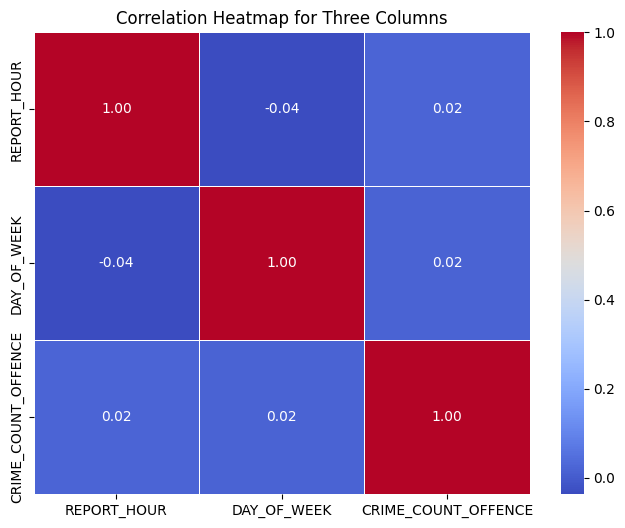

In [409]:
# Select the three columns for the heatmap
columns_for_heatmap = ['REPORT_HOUR', 'DAY_OF_WEEK', 'CRIME_COUNT_OFFENCE']

# Calculate the correlation matrix
correlation_matrix = MCI_toronto_df[columns_for_heatmap].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Three Columns')
plt.show()


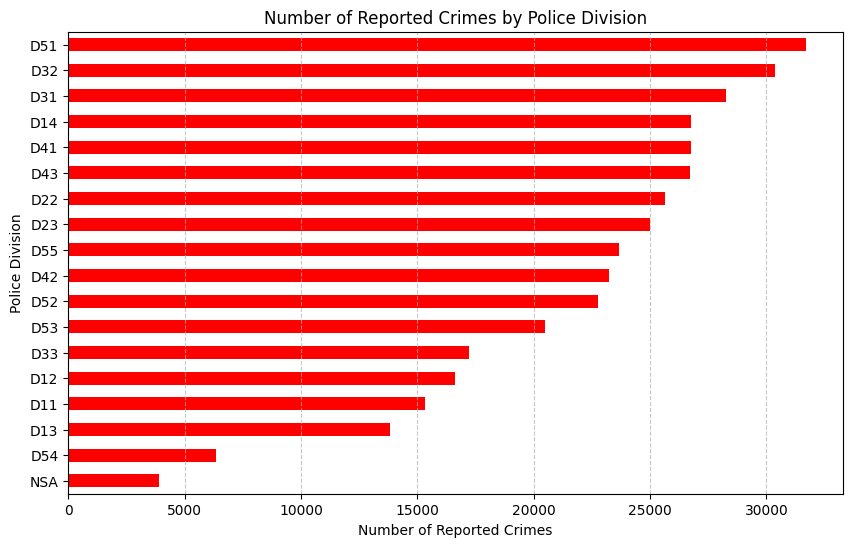

In [420]:
# To find the police division with the the highest and lowest number of reported crimes


# Group the data by police division and calculate the total number of reported crimes
division_crime_counts = MCI_toronto_df['DIVISION'].value_counts()

# Sort the divisions by the number of reported crimes
division_crime_counts = division_crime_counts.sort_values()

# Plot the bar chart
plt.figure(figsize=(10, 6))
division_crime_counts.plot(kind='barh', color='red')
plt.title('Number of Reported Crimes by Police Division')
plt.xlabel('Number of Reported Crimes')
plt.ylabel('Police Division')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Interperation from the above graph is that the D51 police division have recorded the more criminal count close to 35000

In [410]:
print(MCI_toronto_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384566 entries, 0 to 384565
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   _id                   384566 non-null  int64         
 1   EVENT_UNIQUE_ID       384566 non-null  object        
 2   REPORT_YEAR           384566 non-null  int64         
 3   REPORT_MONTH          384566 non-null  object        
 4   REPORT_DAY            384566 non-null  int64         
 5   REPORT_DOY            384566 non-null  int64         
 6   REPORT_DOW            384566 non-null  object        
 7   REPORT_HOUR           384566 non-null  int64         
 8   OCC_YEAR              384566 non-null  int64         
 9   OCC_MONTH             384566 non-null  int64         
 10  OCC_DAY               384566 non-null  int64         
 11  OCC_DOY               384566 non-null  float64       
 12  OCC_DOW               384566 non-null  object        
 13 

In [411]:
#getting the count of the dataset
count_of_dataset = MCI_toronto_df.shape[0]

print(f"Count of the dataset: {count_of_dataset}")

Count of the dataset: 384566


In [413]:
# Export DataFrame to a CSV file
MCI_toronto_df.to_csv('MCI_toronto_data.csv', index=False)

#to print the current working directory
import os
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: c:\Users\Lenovo\Downloads\Maps\Maps
